##### Imports

In [18]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from models.BaselineModel import Baseline_mb
from models.MasterModel import MasterModel
from models.JitterModel import Jitter_model
from functions.get_min_max_dict import get_min_max_dict
from functions.data_gather import data_gather
from functions.get_dataset import get_dataset, normalize
from visualization.compare_plot import plot_results
from visualization.two_dim_hist import Create2d, KDE
from functions.load_model import load_model
from sklearn.metrics import mean_squared_error
import numpy as np
max_count=10


In [2]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: transparent;
}  
</style>


##### Path

In [3]:
ds_path_baseline = 'data/baseline_data_sim_cv'
ds_path_master = 'data/all_data_mb_cv'
ds_path_sim = 'data/all_data_sim_cv'
ds_path_jitter = 'data/jitter_data_mb_cv'

##### Load Datasets

In [4]:
ds_test_baseline = get_dataset(ds_path_baseline)
ds_test_jitter = get_dataset(ds_path_jitter)
ds_test_master = get_dataset(ds_path_master,additional_ds=ds_path_sim).map(normalize)

##### Models

In [5]:
# Baseline
baseline_model = load_model(Baseline_mb(),tf.data.Dataset.load(f"{ds_path_baseline}/0/validation", compression="GZIP"),'ckpt/Baseline_mb/')
base_original,base_predicted,_ = data_gather(ds_test_baseline,baseline_model,max_count=max_count);

IntProgress(value=0, bar_style='success', description='Loading:', max=10)

In [6]:
# JitterModel

jitter_model = load_model(Jitter_model(),ds_test_jitter,'ckpt/JitterModel/');

jitter_original,jitter_predicted,_ = data_gather(ds_test_jitter,jitter_model,max_count=max_count);

IntProgress(value=0, bar_style='success', description='Loading:', max=10)

In [7]:
# MasterModel
data = tf.data.Dataset.load(f"{ds_path_sim}/{4}/validation", compression="GZIP")

master_model = load_model(MasterModel(),ds_test_master,'ckpt/ck/')
original,predicted,mean = data_gather(data,master_model,max_count=max_count);

IntProgress(value=0, bar_style='success', description='Loading:', max=10)

#### Visualization

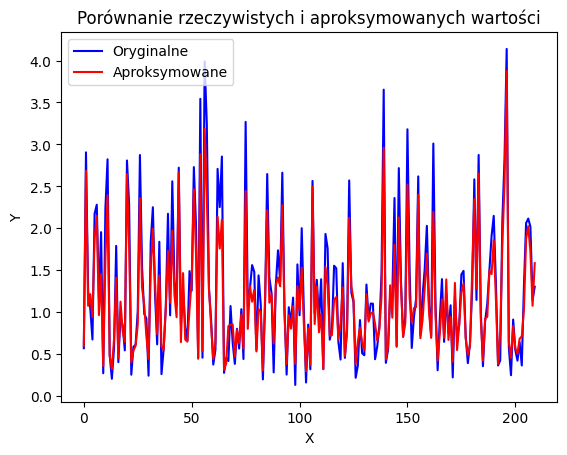

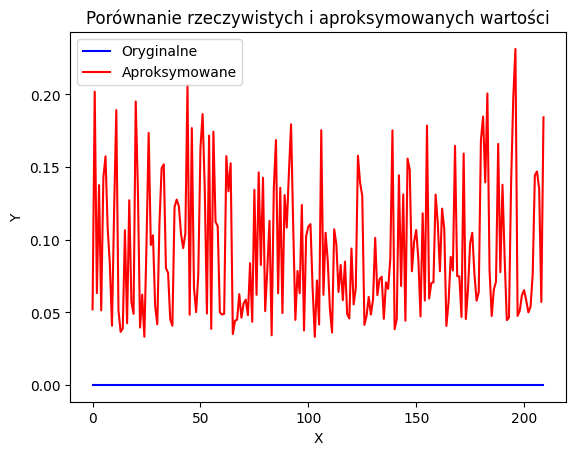

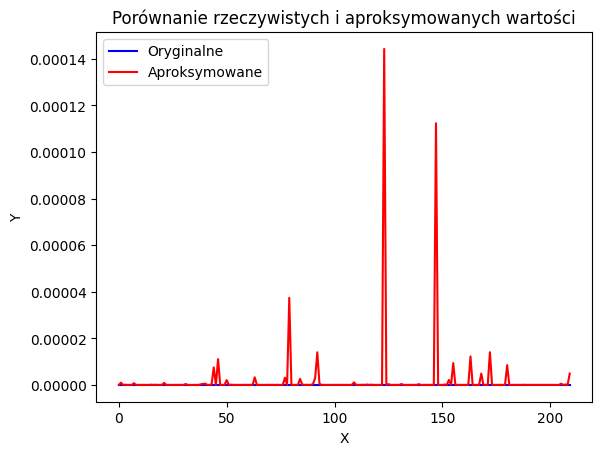

In [8]:
plot_results(original[0],predicted[0],'Porównanie rzeczywistych i aproksymowanych wartości')

plot_results(original[1],predicted[1],'Porównanie rzeczywistych i aproksymowanych wartości')

plot_results(original[2],predicted[2],'Porównanie rzeczywistych i aproksymowanych wartości')

d:\GNN\visualization\two_dim_hist.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
d:\GNN\visualization\two_dim_hist.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


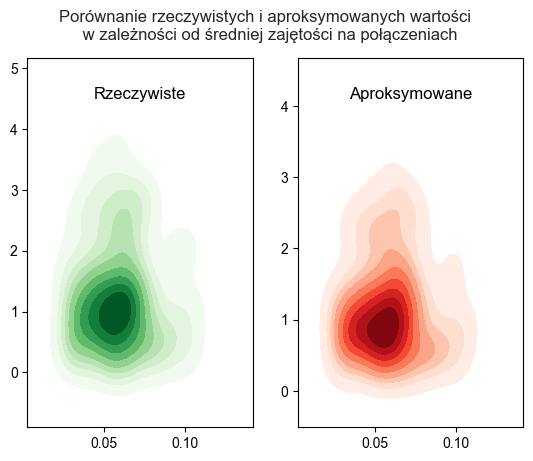

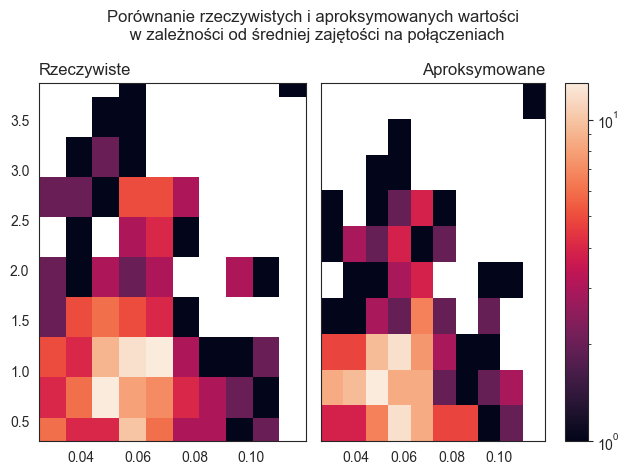

In [9]:
KDE(mean,original[0],predicted[0],title='Porównanie rzeczywistych i aproksymowanych wartości \n w zależności od średniej zajętości na połączeniach',save=False)

Create2d(mean,original[0],predicted[0],bins=(10, 10),title='Porównanie rzeczywistych i aproksymowanych wartości \n w zależności od średniej zajętości na połączeniach',save=False)


In [17]:
%reload_ext tensorboard
%load_ext tensorboard
%tensorboard --logdir tensorboard/MasterModel

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 23272), started 0:29:19 ago. (Use '!kill 23272' to kill it.)

In [19]:
baseline_rmse = mean_squared_error(base_original[0], base_predicted[0])
print(f"Delay Baseline RMSE: {baseline_rmse}")
master_rmse = mean_squared_error(original[0], predicted[0])
print(f"Master Model Delay RMSE: {master_rmse}")

Delay Baseline RMSE: 14518.318853179519
Master Model Delay RMSE: 0.07414780049422216


In [20]:
jitter_rmse = mean_squared_error(jitter_original[0], jitter_predicted[0])
print(f"Jitter Baseline RMSE: {jitter_rmse}")
master_rmse = mean_squared_error(original[1], predicted[1])
print(f"Master Model Jitter RMSE: {master_rmse}")

Jitter Baseline RMSE: 0.38565694396168226
Master Model Jitter RMSE: 0.010903784083975007


In [21]:
import keras
from tensorflow.python.keras.utils.layer_utils import count_params

trainable_count = count_params(master_model.trainable_weights)
non_trainable_count = count_params(master_model.non_trainable_weights)
print('Total params: {:,}'.format(trainable_count + non_trainable_count))
print('Trainable params: {:,}'.format(trainable_count))
print('Non-trainable params: {:,}'.format(non_trainable_count))

Total params: 92,851
Trainable params: 92,851
Non-trainable params: 0


In [ ]:
val = len(list(ds_val))
train = len(list(ds_train))
test = len(list(ds_test))

print('Train: {:,}'.format(train))
print('Validation: {:,}'.format(val))
print('Test: {:,}'.format(test))

combined = val + train + test

print('Train: {:,}'.format(train/combined*100))
print('Validation: {:,}'.format(val/combined*100))
print('Test: {:,}'.format(test/combined*100))